# **Разведочный анализ данных. Исследование и визуализация данных.**

# 1) Текстовое описание набора данных

Датасет состоит из одного файла apple_quality.csv


Файл содержит следующие колонки:
1.   A_id: Уникальный идентификатор для каждого фрукта
2.   Size: Размер плода
3.   Weight: Масса плода
4.   Sweetness: Степень сладости плода
5.   Crunchiness: Текстура, указывающая на хрусткость плода
6.   Juiciness: Уровень сочности плода
7.   Ripeness: Стадия спелости плода
8.   Acidity: Уровень кислотности плода
9.   Quality: Общее качество плода

# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

# Загрузка данных

In [2]:
data = pd.read_csv('apple_quality.csv', sep=",")

# 2) Основные характеристики датасета

---



In [3]:
data.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [4]:
data.shape

(4001, 9)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 4001


In [6]:
data.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [7]:
data.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [8]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

A_id - 1
Size - 1
Weight - 1
Sweetness - 1
Crunchiness - 1
Juiciness - 1
Ripeness - 1
Acidity - 0
Quality - 1


In [9]:
data.replace('', pd.NA, inplace=True)
data.dropna(how='any', inplace=True)

In [10]:
# более простой способ
data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [11]:
data.describe()

A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.874427  
min      -5.961897    -5.864599  
25%      -0.801286    -0.771677  
50%       0.534219     0.503445  
75%       1.835976     1.766212  
max       7.364403     7.237837

In [12]:
data['Quality'].unique()

array(['good', 'bad'], dtype=object)

# 3) Визуальное исследование датасета

<Axes: xlabel='Size', ylabel='Weight'>

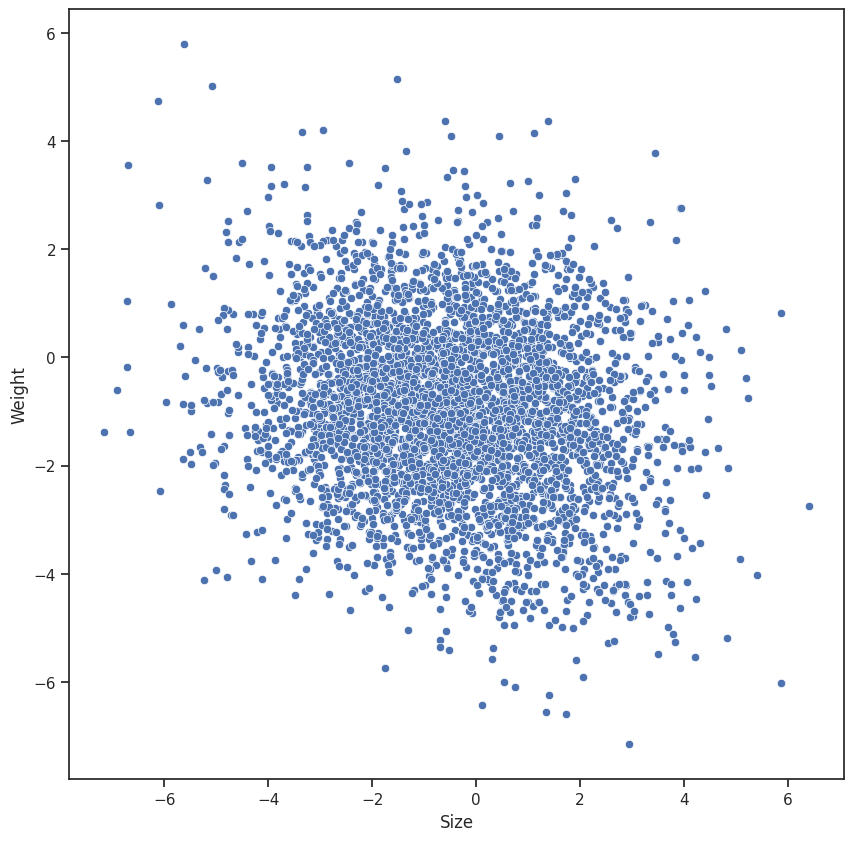

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='Size', y='Weight', data=data)

<Axes: xlabel='Size', ylabel='Weight'>

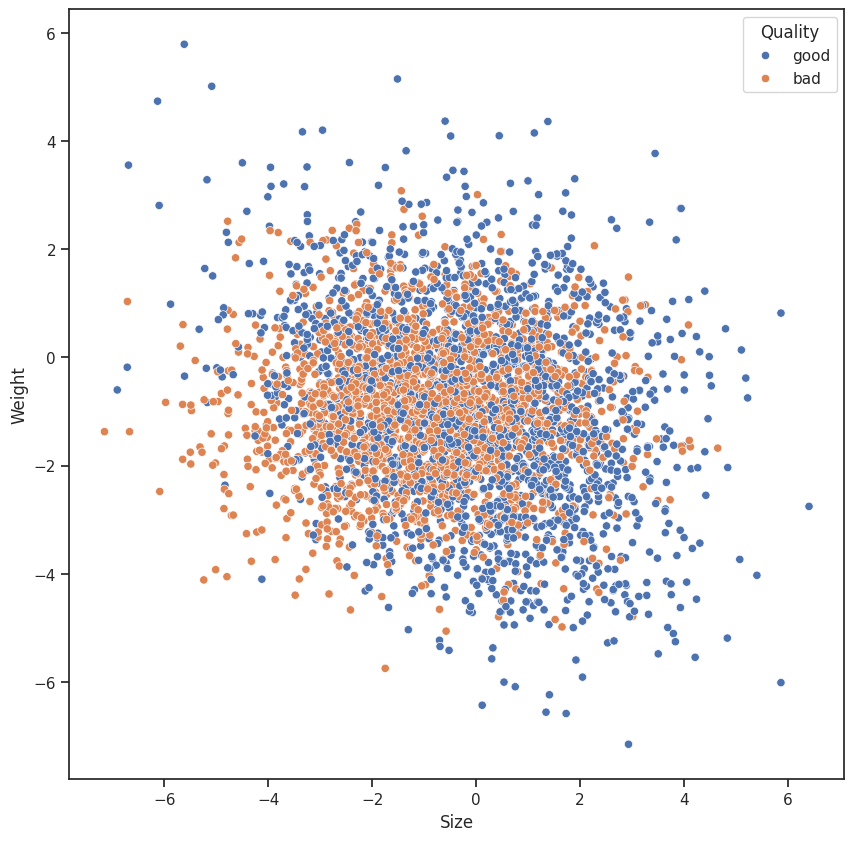

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='Size', y='Weight', data=data, hue='Quality')

# Гистограмма

/tmp/ipykernel_43548/1720429830.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'])


<Axes: xlabel='Size', ylabel='Density'>

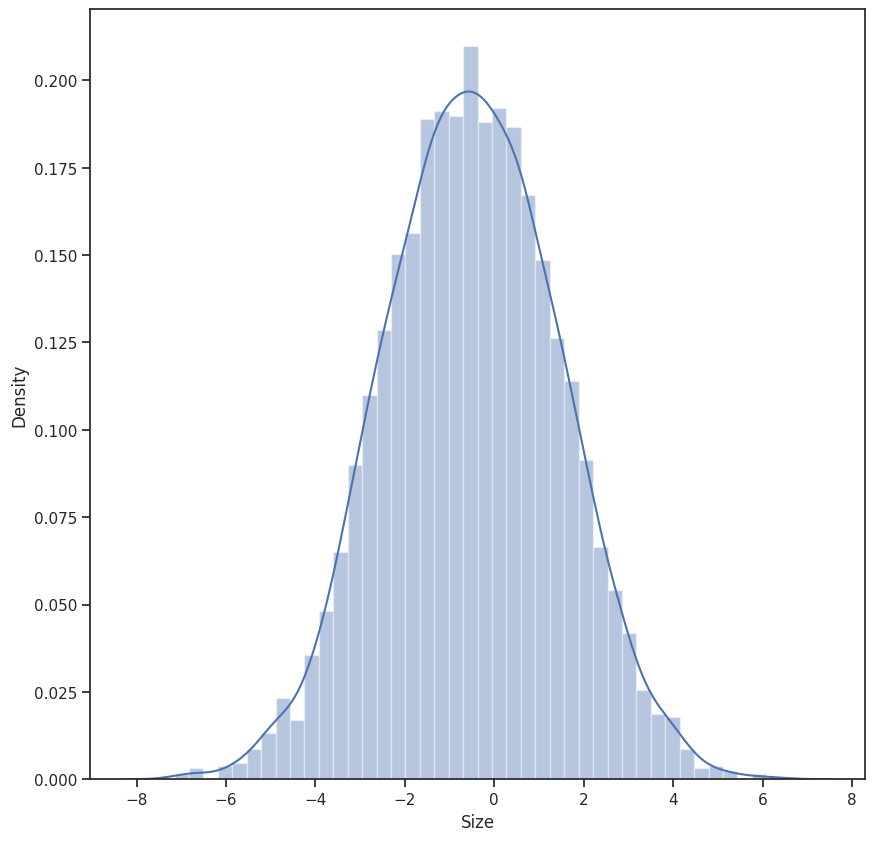

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(data['Size'])

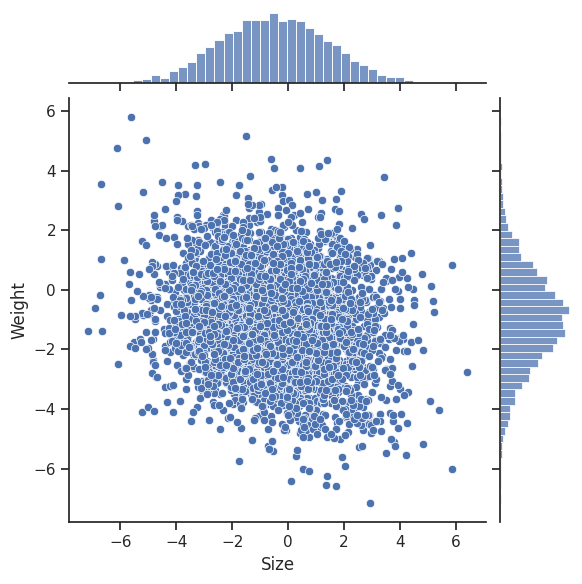

In [16]:
sns.jointplot(x='Size', y='Weight', data=data)

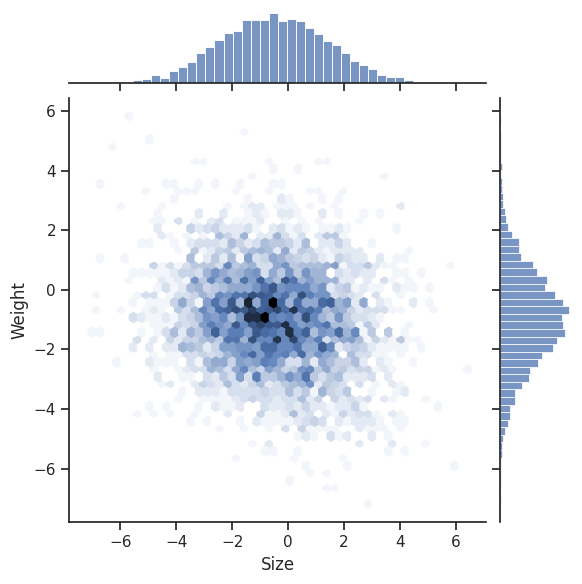

In [17]:
sns.jointplot(x='Size', y='Weight', data=data, kind="hex")

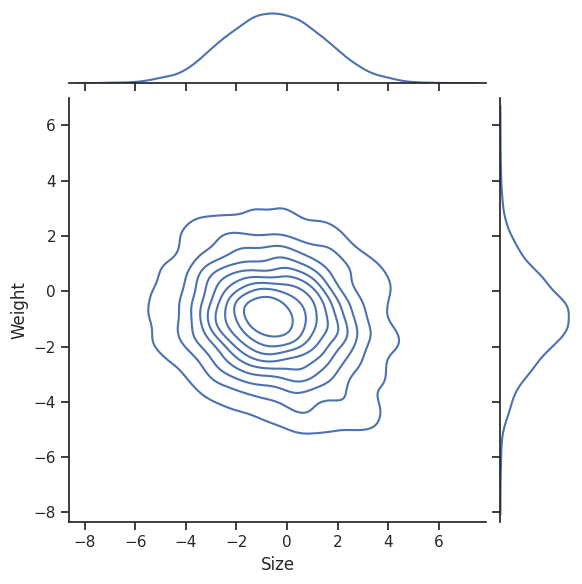

In [18]:
sns.jointplot(x='Size', y='Weight', data=data, kind="kde")

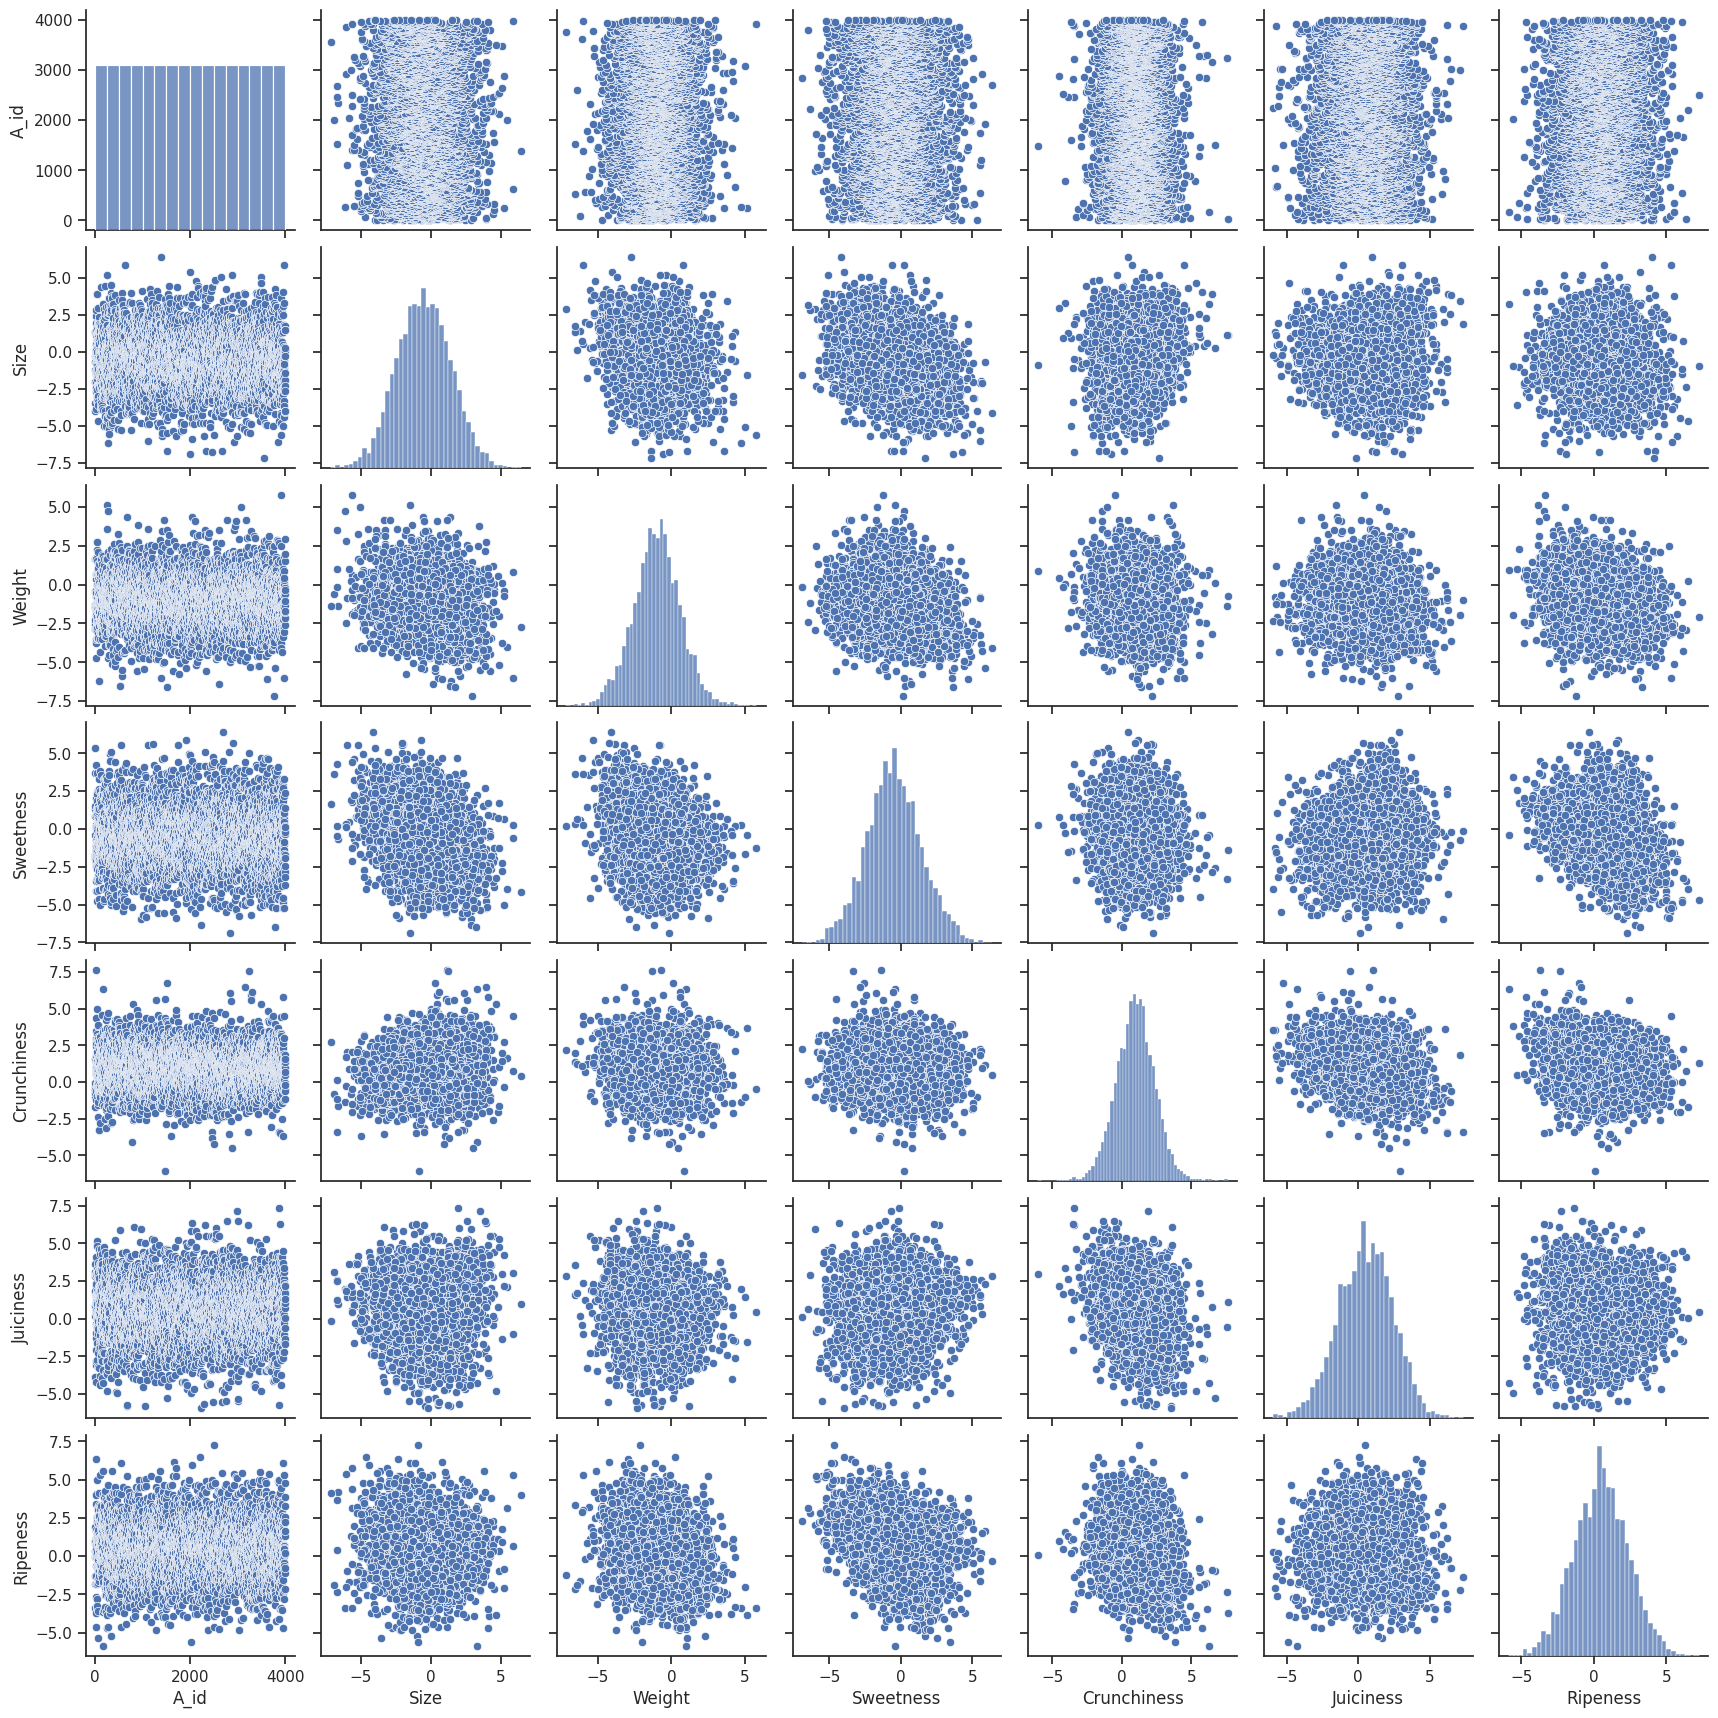

In [19]:
sns.pairplot(data)

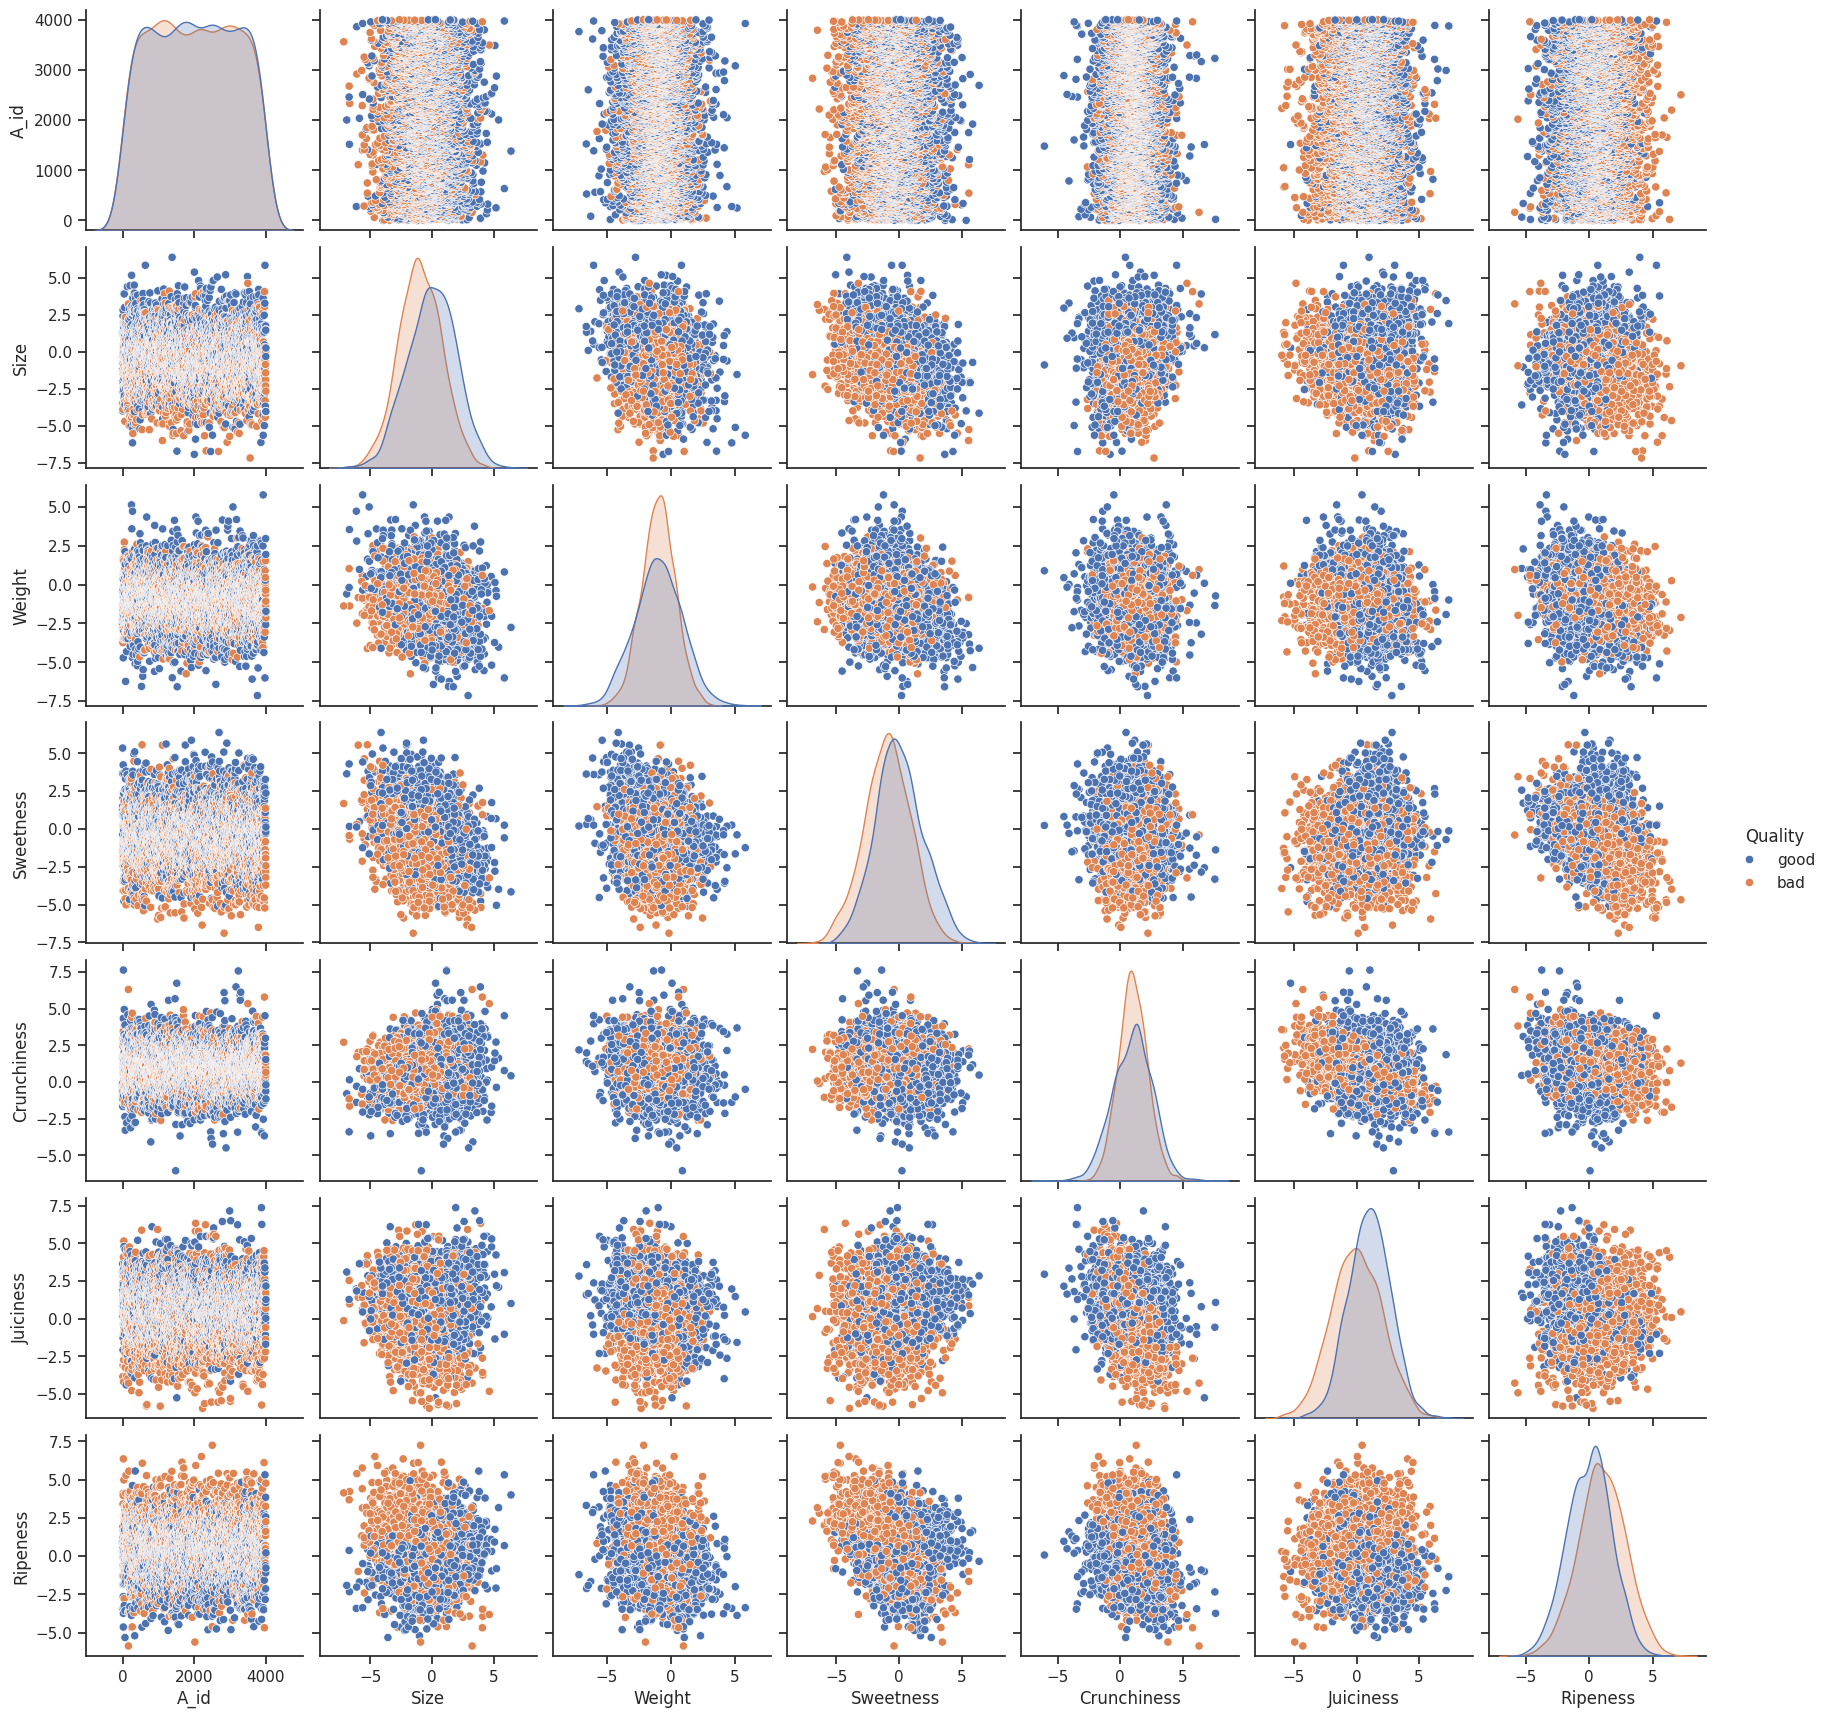

In [20]:
sns.pairplot(data, hue="Quality")

# Ящик с усами

<Axes: xlabel='Size'>

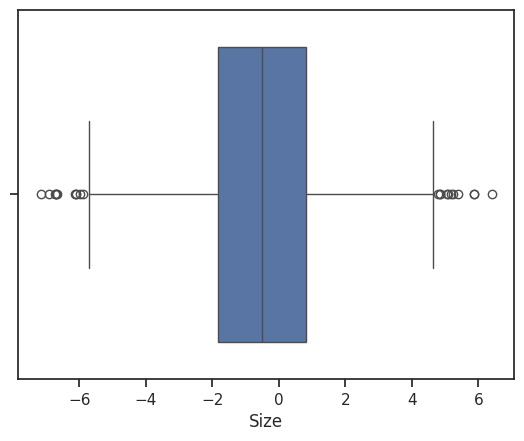

In [21]:
sns.boxplot(x=data['Size'])

<Axes: ylabel='Size'>

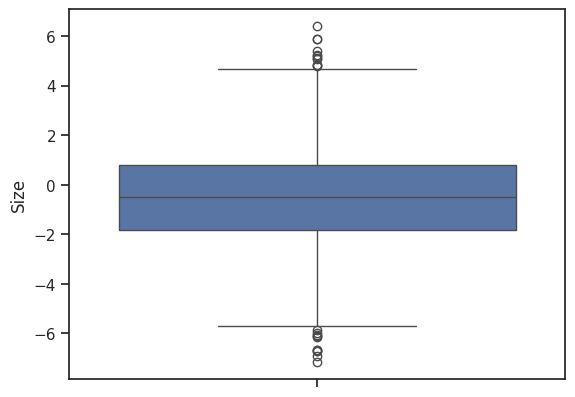

In [22]:
sns.boxplot(y=data['Size'])

<Axes: xlabel='Quality', ylabel='Size'>

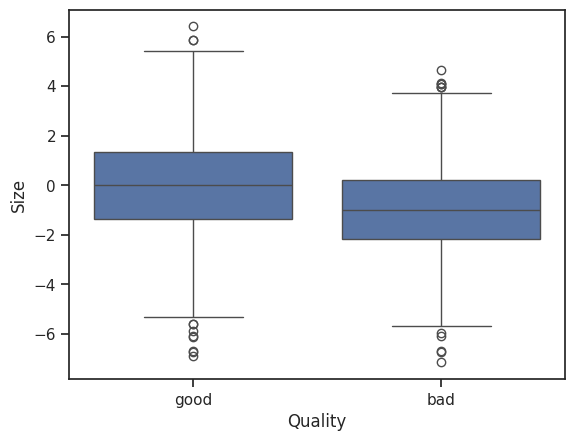

In [23]:
sns.boxplot(x='Quality', y='Size', data=data)

# Violin plot

<Axes: xlabel='Size'>

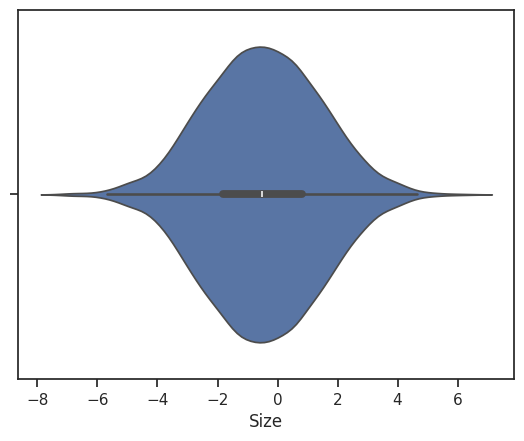

In [24]:
sns.violinplot(x=data['Size'])

/tmp/ipykernel_43548/3661478894.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'], ax=ax[1])


<Axes: xlabel='Size', ylabel='Density'>

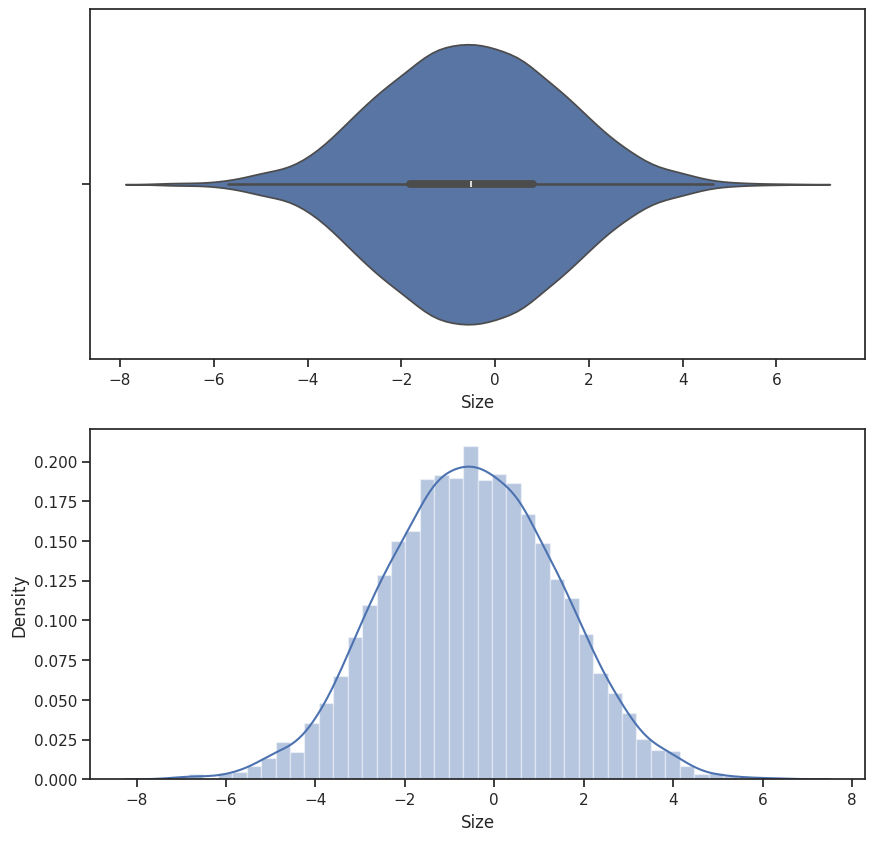

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Size'])
sns.distplot(data['Size'], ax=ax[1])

<Axes: xlabel='Quality', ylabel='Size'>

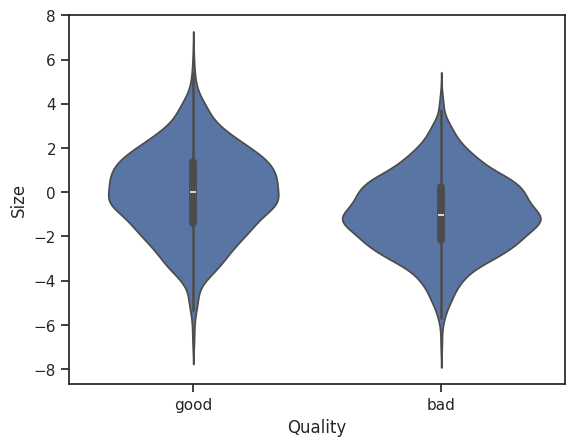

In [26]:
sns.violinplot(x='Quality', y='Size', data=data)

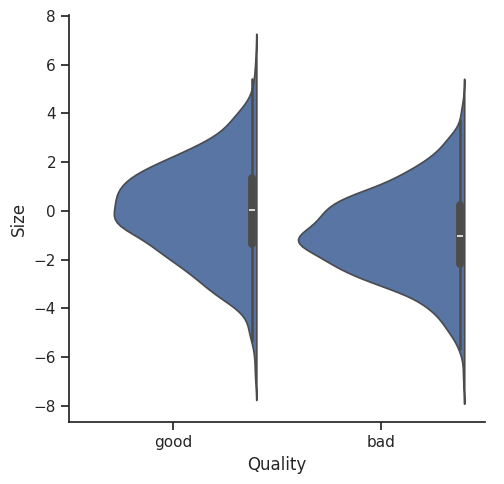

In [27]:
sns.catplot(y='Size', x='Quality', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков

In [28]:
data.corr()

ValueError: could not convert string to float: 'good'

In [ ]:
data.corr(method='kendall')

In [ ]:
sns.heatmap(data.corr())

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')